In [1]:

# package for 3d visualization
from itkwidgets import view                              
from aicssegmentation.core.visual import seg_fluo_side_by_side,  single_fluorescent_view, segmentation_quick_view
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16, 12]

# package for io 
from aicsimageio import AICSImage, omeTifWriter                            

# packages for curve fitting, vector storage
from scipy.optimize import curve_fit
import numpy as np

# local new python segmentation functions
import os
import sys
pythonPackagePath = os.path.abspath('../src/')
sys.path.append(pythonPackagePath)
from peak_local_max_3d import peak_local_max_3d 
from gaussian_fitting import gaussian_1d_output, fit_gaussian, fit_multiple_gaussians, check_fitting_error
from extract_data import extract_data_from_filename
from view_data_and_local_maxima import view_raw_data_and_detected_maxima


%matplotlib inline


from peak_local_max_3d import peak_local_max_3d 

import numpy as np
#import pims
import skimage
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# insert file directory below as FILE_NAME

In [2]:
FILE_NAME = '../test_data/cropped_488_pm50px_maxAmpl_0000.tif'

# View Raw Data:


In [3]:
image_raw = extract_data_from_filename(FILE_NAME)
view(single_fluorescent_view(image_raw))


Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageF3; proxy of <Swig Object of type 'itkIma…

In [4]:
# #image = skimage.external.tifffile.imread('../test_data/cropped_master_0000_20pxPadding_frame1.tif')
# peaks = structure_img >15000
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(np.nonzero(peaks)[0],np.nonzero(peaks)[1],np.nonzero(peaks)[2],alpha = 0.1)

In [5]:
intensityThreshold = 30000

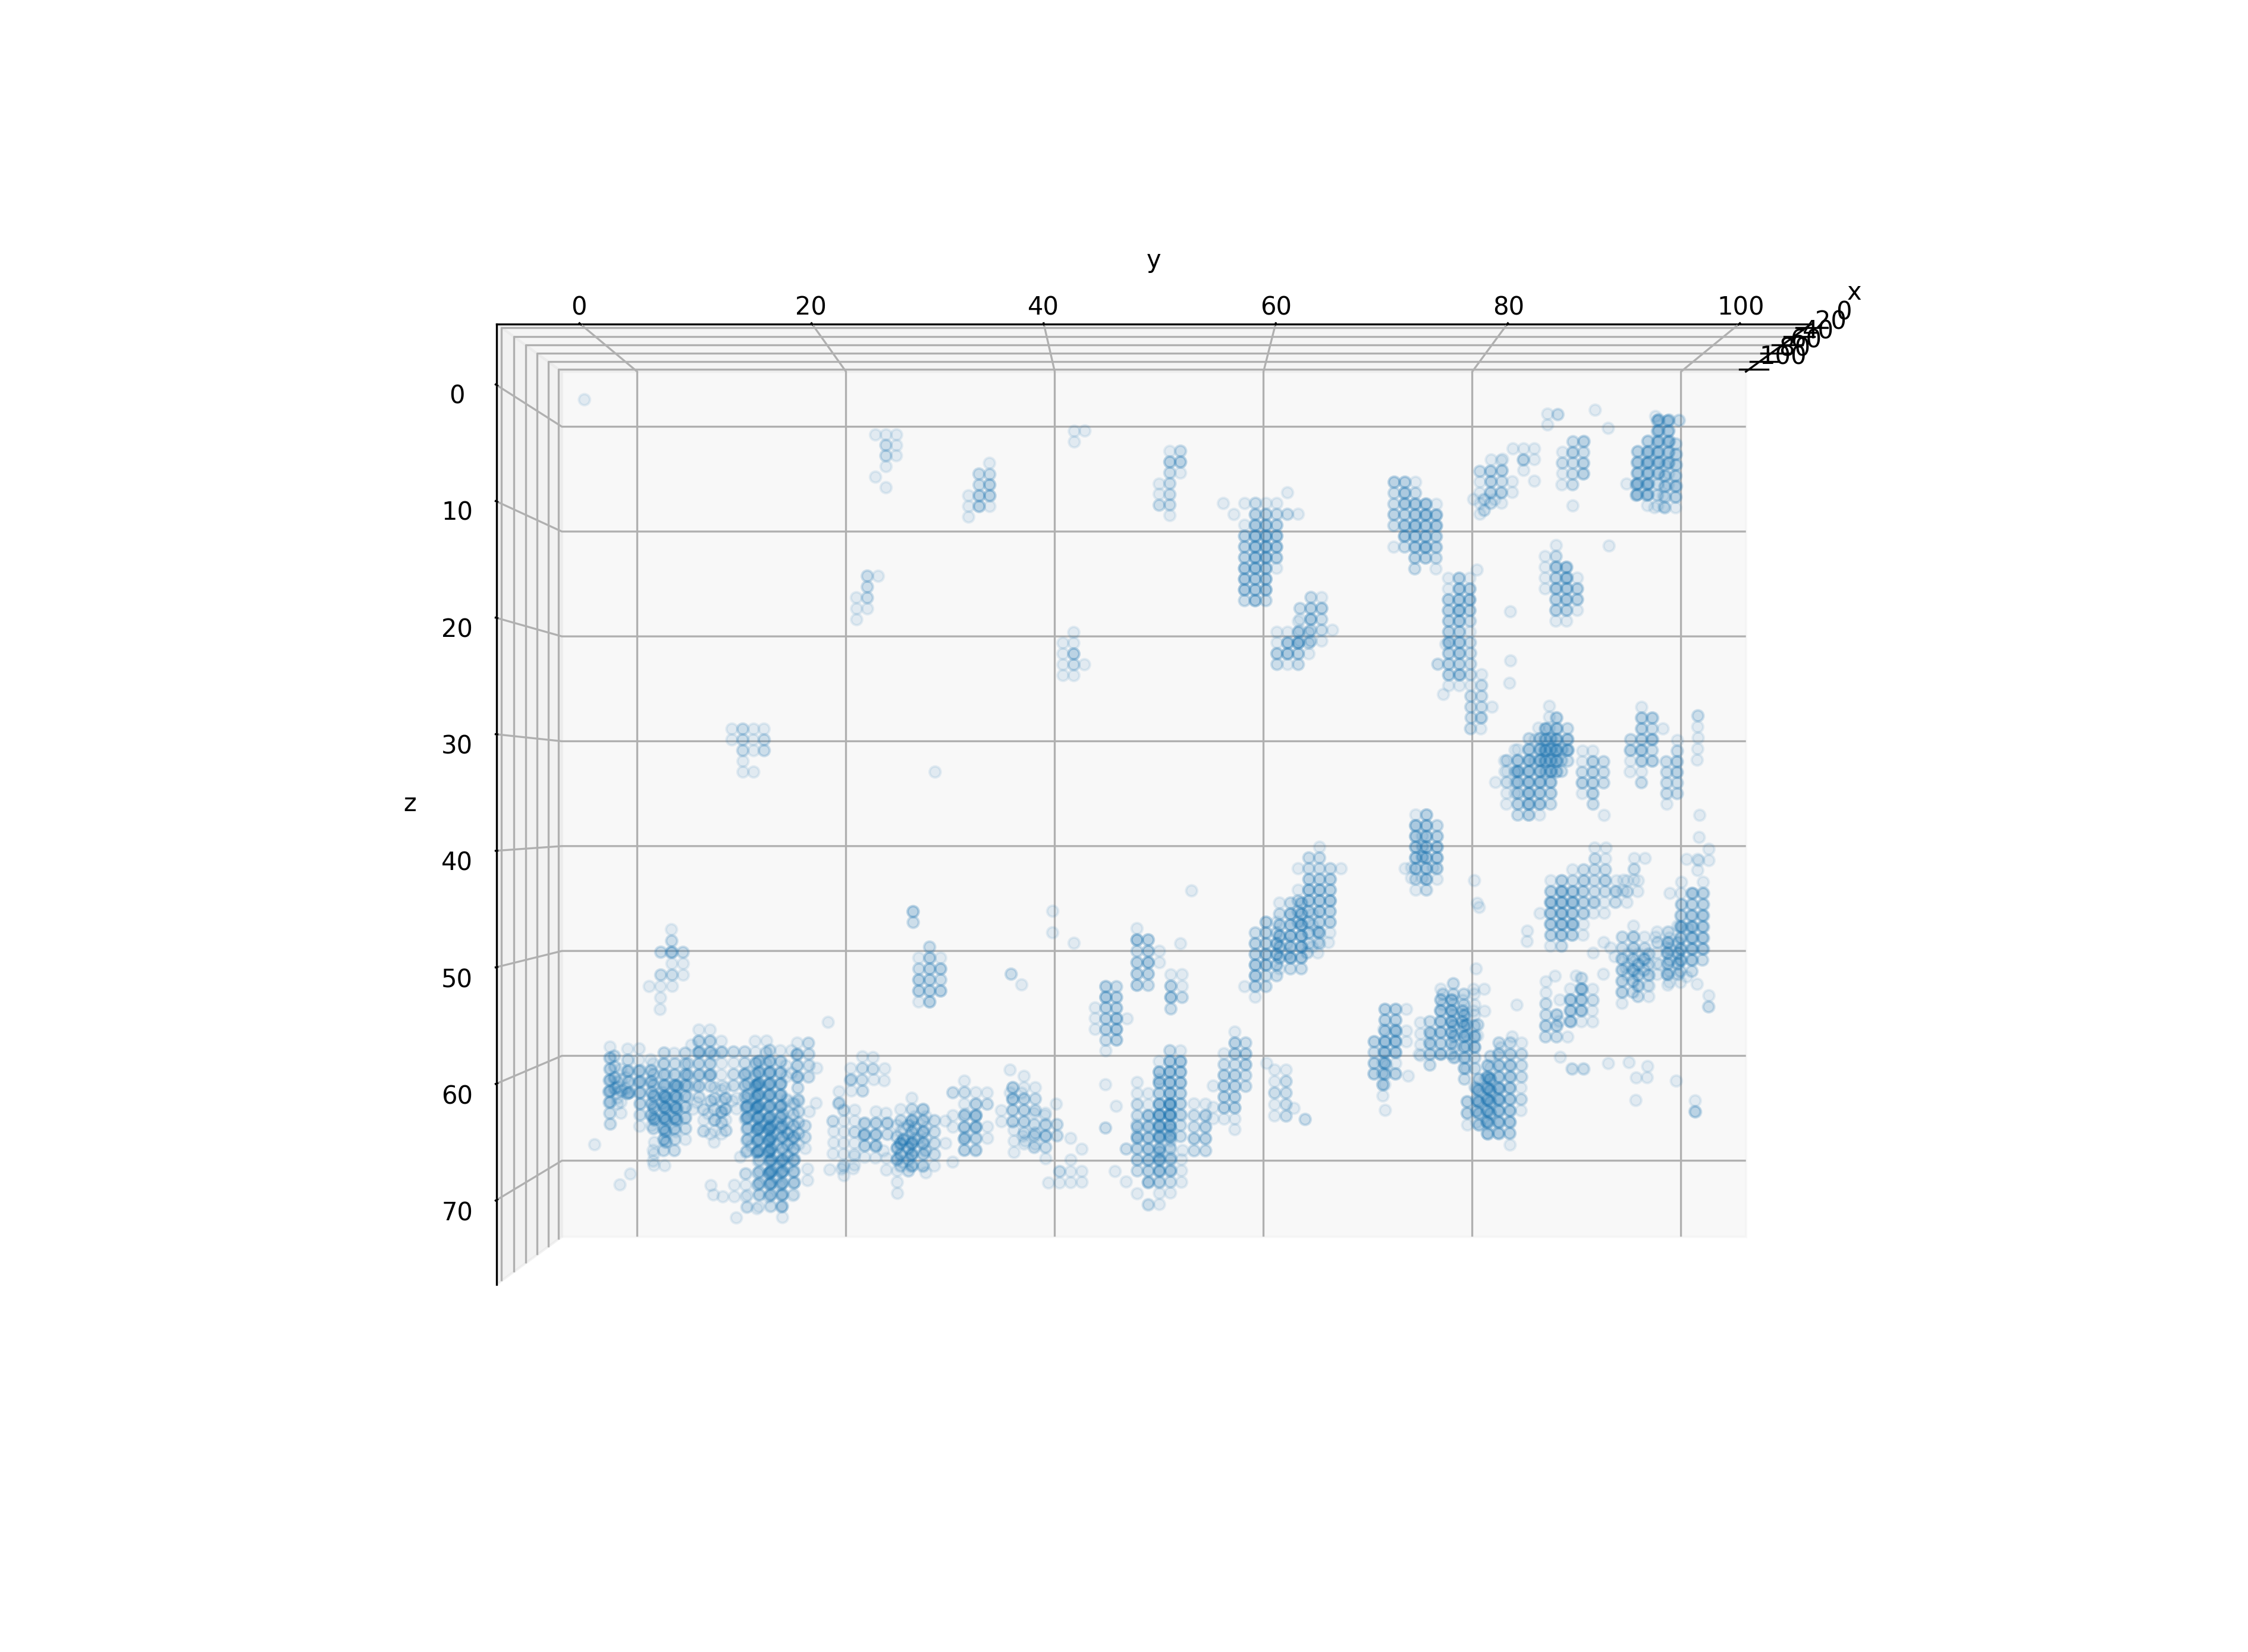

In [6]:
image_signal = image_raw>intensityThreshold
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
X= np.nonzero(image_signal)[2]
Y= np.nonzero(image_signal)[1]
Z= np.nonzero(image_signal)[0]
ax.scatter(X,Y,Z,alpha = 0.1)

# Create cubic bounding box to simulate equal aspect ratio
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(X.max()+X.min())
Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(Y.max()+Y.min())
Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()+Z.min())

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(180, 0)

plt.grid()



In [6]:
view(single_fluorescent_view(image_signal))

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageF3; proxy of <Swig Object of type 'itkIma…

In [20]:
maximas = peak_local_max_3d(image_raw,min_distance=10,threshold=30000)
print(len(maximas))

57


In [21]:
#accumulator = np.zeros(image_raw.shape)
accumulator = np.full(image_raw.shape,False)
for maxima in maximas:
    #print(maxima)
    accumulator[maxima[0],maxima[1],maxima[2]] = 1000


In [22]:
view(single_fluorescent_view(accumulator))

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageF3; proxy of <Swig Object of type 'itkIma…

# Gaussian Fitting

In [12]:
#view_raw_data_and_detected_maxima(structure_img,maximas)

In [23]:
sigmaExpected_x__pixels = 2
sigmaExpected_y__pixels = 2
sigmaExpected_z__pixels = 4

sigmas_guesses = []
for i in range(len(maximas)):
    sigmas_guesses.append([sigmaExpected_z__pixels,sigmaExpected_x__pixels,sigmaExpected_y__pixels])

In [25]:
net_gaussians, individual_gaussians = fit_multiple_gaussians(image_raw,maximas,sigmas_guesses,5)

gaussian parameters could not be optimized
gaussian parameters could not be optimized


In [27]:
net_gaussians[0]

[34319.83463541409,
 [-1.6732410538548772, 86.50359046673083, 70.40015783344226],
 [4.343030386797152, 1.469427188665306, 2.1040717329329]]

In [28]:
individual_gaussians[0]

[array([ 3.43231680e+04, -1.67324105e+00,  4.34303039e+00]),
 array([3.43131680e+04, 8.65035905e+01, 1.46942719e+00]),
 array([3.43231680e+04, 7.04001578e+01, 2.10407173e+00])]

# visualize the fitted Gaussians

# Gaussian statistics

In [26]:
net_gaussians

[[34319.83463541409,
  [-1.6732410538548772, 86.50359046673083, 70.40015783344226],
  [4.343030386797152, 1.469427188665306, 2.1040717329329]],
 [33431.3007813121,
  [2.025579392647571, 41.734512848498994, 87.58254609019524],
  [2.6345359549918856, 1.7303960798368239, 1.5806747063941697]],
 [36507.282552084245,
  [6.105357420032873, 33.63481978931313, 89.08109492220437],
  [3.040921571154933, 1.5916843327973305, 1.6996869440197642]],
 [39859.17317708335,
  [5.852653039322815, 50.78922098174301, 84.82852361330006],
  [3.3169617271238128, 1.4311482860090903, 1.4273104216561099]],
 [48805.62500007706,
  [6.6813932848438595, 81.30705845195295, 78.85626012095827],
  [2.4433792926049844, 1.5156194119757422, 1.5124895190341814]],
 [37670.65625000031,
  [8.346689799766715, 80.04132810460709, 64.5610436313617],
  [2.402855259028378, 2.164995945479633, 1.7069082399066908]],
 [62521.01692708389,
  [9.915106495549805, 74.48592009537107, 82.26473934523443],
  [2.4370344977066387, 1.999279042619299,

In [16]:
amplitude_fit = []
z_sigmas_fit = []
x_sigmas_fit = []
y_sigmas_fit = []
y_sigmas_fit_under_10 = []
for gaussian_temp in net_gaussians:
    if gaussian_temp != -1:
        
    #print(gaussian_temp[2])
        z_sigmas_fit.append(gaussian_temp[2][0])
        x_sigmas_fit.append(gaussian_temp[2][1])
        y_sigmas_fit.append(gaussian_temp[2][2])
        amplitude_fit.append(gaussian_temp[0])
for y_sigma in y_sigmas_fit:
    
    if y_sigma < 10:
        
        y_sigmas_fit_under_10.append(y_sigma)

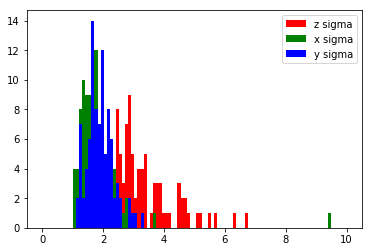

In [17]:
bins = np.linspace(0, 10, 100)
plt.hist(z_sigmas_fit,bins,color='r',label = 'z sigma')
plt.hist(x_sigmas_fit,bins,color='g',label = 'x sigma')
plt.hist(y_sigmas_fit,bins,color='b',label = 'y sigma')
plt.legend(loc = 'best')
plt.show()

(array([5., 5., 3., 1., 3., 3., 1., 3., 7., 1., 2., 4., 2., 4., 5., 5., 3.,
        0., 3., 1., 2., 1., 2., 1., 2., 1., 3., 0., 1., 1., 1., 0., 0., 1.,
        2., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([40040.89322917, 40530.24513363, 41019.59703809, 41508.94894255,
        41998.30084702, 42487.65275148, 42977.00465594, 43466.3565604 ,
        43955.70846487, 44445.06036933, 44934.41227379, 45423.76417825,
        45913.11608272, 46402.46798718, 46891.81989164, 47381.1717961 ,
        47870.52370056, 48359.87560503, 48849.22750949, 49338.57941395,
        49827.93131841, 50317.28322288, 50806.63512734, 51295.9870318 ,
        51785.33893626, 52274.69084073, 52764.04274519, 53253.39464965,
        53742.74655411, 54232.09845858, 54721.4503

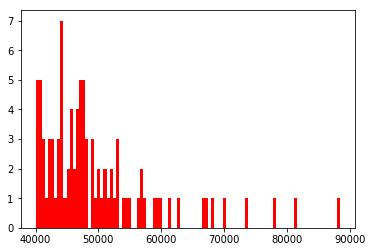

In [18]:
bins = np.linspace(min(amplitude_fit), max(amplitude_fit), 100)
plt.hist(amplitude_fit,bins,color='r',label = 'z sigma')

In [19]:
print('test')

test


In [22]:
mean_sigma_z = np.mean(z_sigmas_fit)
mean_sigma_x = np.mean(x_sigmas_fit)
mean_sigma_y = np.mean(y_sigmas_fit)
mean_sigma_z_under_10 = np.mean(z_sigmas_fit_under_10)
mean_sigma_x_under_10 = np.mean(x_sigmas_fit_under_10)
mean_sigma_y_under_10 = np.mean(y_sigmas_fit_under_10)

NameError: name 'z_sigmas_fit_under_10' is not defined

In [23]:
print(mean_sigma_z_under_10)
print(mean_sigma_x_under_10)
#print(mean_sigma_y)
print(mean_sigma_y_under_10)

NameError: name 'mean_sigma_z_under_10' is not defined

In [24]:
count_non_fits = 0
for gaussian in net_gaussians:
    if gaussian == -1:
        count_non_fits += 1

In [25]:
count_non_fits

18

In [26]:
# def check_fitting_error(image,maximas,net_gaussians,sigmas_guesses):
errors = check_fitting_error(structure_img,maximas,net_gaussians,sigmas_guesses)

the gaussian did not fit
the gaussian did not fit
the gaussian did not fit
the gaussian did not fit
the gaussian did not fit
the gaussian did not fit
the gaussian did not fit
the gaussian did not fit
the gaussian did not fit
the gaussian did not fit
the gaussian did not fit
the gaussian did not fit
the gaussian did not fit
the gaussian did not fit
the gaussian did not fit
the gaussian did not fit
the gaussian did not fit
the gaussian did not fit


In [27]:
amplitude_errors = []
mean_errors_z = []
mean_errors_x = []
mean_errors_y = []
sigma_errors_z = []
sigma_errors_x = []
sigma_errors_y = []


for error in errors:
    amplitude_errors.append(error[0])
    mean_errors_z.append(error[1][0])
    mean_errors_x.append(error[1][1])
    mean_errors_y.append(error[1][2])
    sigma_errors_z.append(error[2][0])
    sigma_errors_x.append(error[2][1])
    sigma_errors_y.append(error[2][2])
    

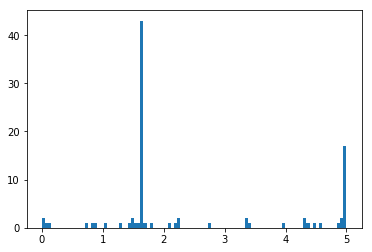

In [28]:
bins = np.linspace(min(amplitude_errors), max(amplitude_errors), 100)

plt.hist(amplitude_errors, bins)
plt.show()

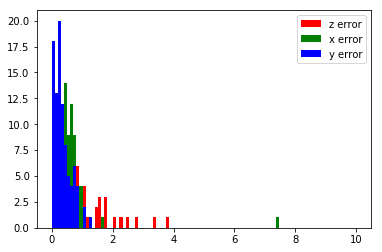

In [29]:
# import random
# import numpy
# from matplotlib import pyplot

# x = [random.gauss(3,1) for _ in range(400)]
# y = [random.gauss(4,2) for _ in range(400)]

# bins = numpy.linspace(-10, 10, 100)

# pyplot.hist(x, bins, alpha=0.5, label='x')
# pyplot.hist(y, bins, alpha=0.5, label='y')
# pyplot.legend(loc='upper right')
# pyplot.show()

temp_sigma_errors_y = []
for error in sigma_errors_y:
    if error<10:
        temp_sigma_errors_y.append(error)
        

bins = np.linspace(0, 10, 100)
plt.hist(sigma_errors_z,bins,color='r',label = 'z error')
plt.hist(sigma_errors_x,bins,color='g',label = 'x error')
plt.hist(temp_sigma_errors_y,bins,color='b',label = 'y error')
plt.legend(loc = 'best')
plt.show()

In [30]:
def process_image(structure_img, intensity_scaling_param,gaussian_smoothing_sigma,s3_param,minArea_watershed,minArea_rso):
    ################################
    intensity_scaling_param = intensity_scaling_param
    gaussian_smoothing_sigma = gaussian_smoothing_sigma
    ################################

    

    # intensity normalization
    structure_img = intensity_normalization(structure_img, scaling_param=intensity_scaling_param)

# # So, 3D guassian smoothing may further aggravate the subtle shift in consecutive z-slices. 
# # If your data do not have such problem, you can certainly try 3D gaussian by 
# # image_smoothing_gaussian_3d(struct_img, sigma=gaussian_smoothing_sigma) with gaussian_smoothing_sigma = 1. 
# # To deal with very noisy data, you may consider increase gaussian_smoothing_sigma from 1 to a higher value, 
# # like 1.5 or 2.

    # smoothing with gaussian filter
#     structure_img_smooth = image_smoothing_gaussian_slice_by_slice(structure_img, sigma=gaussian_smoothing_sigma)
    structure_img_smooth = image_smoothing_gaussian_3d(structure_img, sigma=gaussian_smoothing_sigma)
    
    ## PARAMETERS for this step ##
    s3_param = s3_param
    ################################

#     bw = dot_3d_wrapper(structure_img_smooth, s3_param)

    # # view the segmentation result
    # viewer_bw = view(segmentation_quick_view(bw))
    # viewer_bw

#     # watershed
#     minArea = minArea_watershed
#     Mask = remove_small_objects(bw>0, min_size=minArea, connectivity=1, in_place=False) 
#     Seed = dilation(peak_local_max(structure_img,labels=label(Mask), min_distance=2, indices=False), selem=ball(1))
#     Watershed_Map = -1*distance_transform_edt(bw)
#     seg = watershed(Watershed_Map, label(Seed), mask=Mask, watershed_line=True)

    ################################
    ## PARAMETERS for this step ##
    minArea = minArea_rso
    ################################

    final_seg = remove_small_objects(structure_img_smooth>0, min_size=minArea, connectivity=1, in_place=False)
    
    return final_seg
    
    


# View Processed Data:

In [19]:
# works decently well:

#0.9 sigma for smoothing

#[[s3 param ]]
# first one is the dot size
# second one is the cutoff

# watershed

# reduce noise
#final_seg = process_image(structure_img,[1.5, 13.0], 0.5,[[5,0.09], [2.5,0.07], [1,0.01]],4,5)
#final_seg = process_image(structure_img,[1.5, 13.0], 1,[[5,0.09], [2.5,0.07], [1,0.01]],4,5)
final_seg = process_image(structure_img,[1.5, 13.0], 1,[[1,0.01]],4,5)

#final_seg = process_image(structure_img,[0], 0.9, [[3,0.022]],4,5)

#final_seg = process_image(structure_img,[0],1,[[3,0.22],[1, 0.04],[1, 0.012],[1, 0.03]],2.5,5)
#final_seg = process_image(structure_img,[8000],1,[[3,0.22],[1, 0.012],[1, 0.03]],2.5,5)
viewer_final = view(segmentation_quick_view(final_seg))

viewer_final

intensity normalization: normalize into [mean - 1.5 x std, mean + 13.0 x std] 
intensity normalization completes


Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageUC3; proxy of <Swig Object of type 'itkIm…

In [18]:
final_seg = final_seg >0
out=final_seg.astype(np.uint8)
out[out>0]=255
writer = omeTifWriter.OmeTifWriter('test_for_joh_2.tiff')
writer.save(out)

In [6]:
print('test')

test
